In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
rul_df = pd.read_csv('exam2_modify1.csv')
rul_df.head()

,engine,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,190
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,188


In [5]:
rul_df.columns

Index(['engine', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'RUL'],
      dtype='object')

In [10]:
features = ['T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

label = 'RUL'

#### Features Selection -> embbed 

In [11]:
from sklearn.ensemble import RandomForestRegressor as rf

model = rf()
model.fit(rul_df[features], rul_df[label])

RandomForestRegressor()

In [12]:
importance = pd.DataFrame()
importance['features'] = features
importance['imp'] = model.feature_importances_
importance.sort_values(by='imp', ascending=False)

,features,imp
10,Ps30,0.435254
8,Nc,0.128233
3,T50,0.096121
11,phi,0.047484
13,NRc,0.039783
6,P30,0.039615
14,BPR,0.035659
20,W32,0.034388
2,T30,0.031279
1,T24,0.030252


In [13]:
import seaborn as sns

<Axes: xlabel='RUL', ylabel='Ps30'>

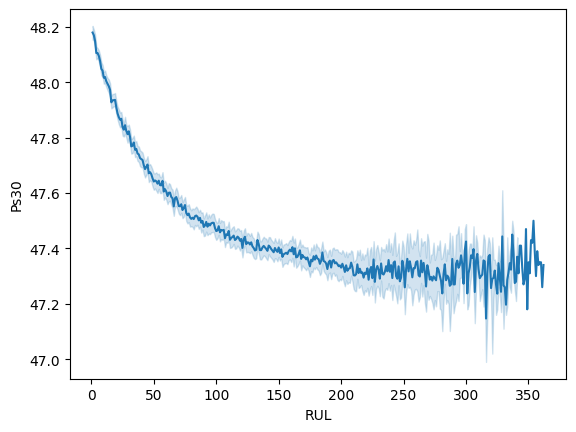

In [16]:
sns.lineplot(data=rul_df, x='RUL', y='Ps30')

<Axes: xlabel='RUL', ylabel='W32'>

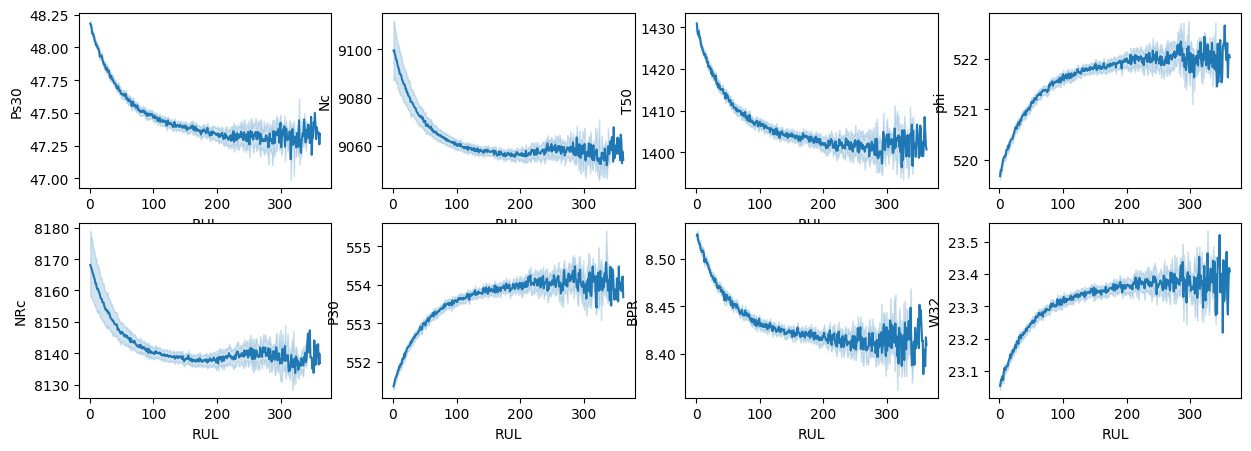

In [17]:
상위 8개의 column과 RUL과 관계

fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(15,5)

sns.lineplot(data=rul_df, x='RUL', y='Ps30' ,ax=ax1)
sns.lineplot(data=rul_df, x='RUL', y='Nc' ,ax=ax2)
sns.lineplot(data=rul_df, x='RUL', y='T50' ,ax=ax3)
sns.lineplot(data=rul_df, x='RUL', y='phi' ,ax=ax4)

sns.lineplot(data=rul_df, x='RUL', y='NRc' ,ax=ax5)
sns.lineplot(data=rul_df, x='RUL', y='P30' ,ax=ax6)
sns.lineplot(data=rul_df, x='RUL', y='BPR' ,ax=ax7)
sns.lineplot(data=rul_df, x='RUL', y='W32' ,ax=ax8)

<Axes: xlabel='RUL', ylabel='Nf_dmd'>

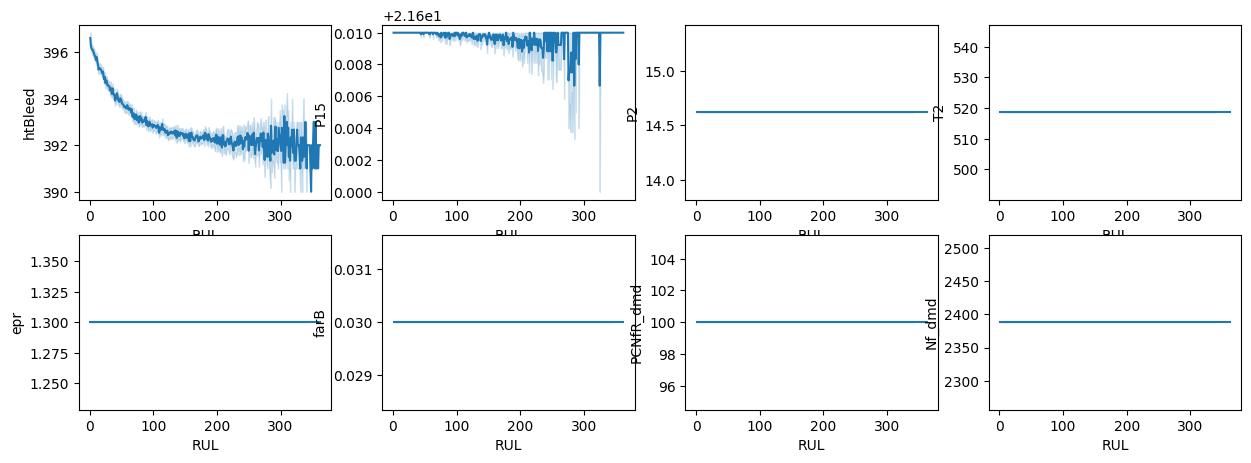

In [18]:
# 하위 8개의 column과 RUL과 관계

fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(15,5)

sns.lineplot(data=rul_df, x='RUL', y='htBleed' ,ax=ax1)
sns.lineplot(data=rul_df, x='RUL', y='P15' ,ax=ax2)
sns.lineplot(data=rul_df, x='RUL', y='P2' ,ax=ax3)
sns.lineplot(data=rul_df, x='RUL', y='T2' ,ax=ax4)

sns.lineplot(data=rul_df, x='RUL', y='epr' ,ax=ax5)
sns.lineplot(data=rul_df, x='RUL', y='farB' ,ax=ax6)
sns.lineplot(data=rul_df, x='RUL', y='PCNfR_dmd' ,ax=ax7)
sns.lineplot(data=rul_df, x='RUL', y='Nf_dmd' ,ax=ax8)

In [22]:
# filter 방식의 변수 선택하는 방법

desc = rul_df.describe().T
desc.loc[desc['std'] < 0.01]

,count,mean,std,min,25%,50%,75%,max
op_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.00,0.0015,0.0087
op_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.00,0.0003,0.0006
op_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000
T2,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.67,518.6700,518.6700
P2,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.62,14.6200,14.6200
P15,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.61,21.6100,21.6100
epr,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.30,1.3000,1.3000
farB,20631.0,0.030000,1.387812e-17,0.0300,0.0300,0.03,0.0300,0.0300
Nf_dmd,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.00,2388.0000,2388.0000
PCNfR_dmd,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000


In [23]:
desc.loc[desc['std'] >= 0.01].T.columns

Index(['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL'],
      dtype='object')

In [24]:
interested = ['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL']
rul_df[interested].to_csv('exam2.modify2.csv', index=False)

In [26]:
pd.read_csv('exam2.modify2.csv')

,engine,cycle,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,191
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,190
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,189
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,5
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,4
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,3
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,2


### 모델 기획 및 수립
머신러닝 모델 기획 및 수립 과정은 문제 정의에서 모델 배포에 이르는 일련의 단계로 구성되며, 각 단계는 모델의 성능과 성공 여부에 중요한 영향 미침.
다음은 머신러닝 프로젝트를 기획하고 모델을 성공적으로 수립하는 기본적인 과정

1. 문제 정의 및 목표 설정
모델 기획의 첫 단계는 해결(문제가 있는 것)하고자 하는 문제를 명확히 정의하고 목표를 설정하는 것

- 문제 정의 : 비즈니스 목표와 관련된 문제를 명확히 정의, 예르 들면  고객 이탈 예측, 제품 추천, 신용 리스크 평가 등
- 목표 설정 : 모델이 가져올 기대 효과(예: 매출 증대, 비용 절감 등)를 정량화하고, 성능 지표(정확도, 정밀도, 재현율, RMSE 등)를 설정
- 모델의 범위와 제한 조건 : 데이터 가용성, 계산 자원, 시간, 예산 등 모델 구축 시의 제한 조건을 명확히 파악

2. 데이터 수집 및 이해
문제 해결에 필요한 데이터를 수집하고, 데이터를 이해하는 단계

- 데이터 수집 : 내부 데이터베이스, 웹 크롤링, 오픈 데이터, 외부 API 등에서 필요한 데이터를 수집
- 데이터 이해 : 수집한 데이터의 특성과 분포, 결측값, 이상치를 파악하여 데이터가 모델링에 적합한지를 확인
- 데이터 라벨링 : 데이터가 지도 학습 문제라면 라벨이 필요하므로, 라벨링이 필요한 경우 인력 또는 자동화된 도구를 사용하여 데이터를 라벨링

3. 데이터 전처리 및 탐색적 데이터 분석(EDA)
모델 학습에 적합한 데이터 형식으로 가공하고, 데이터의 특성을 이해하여 가설을 수립하는 과정

- 데이터 클리닝 : 결측값 처리, 이상치 제거, 중복 데이터 제거 등의 작업을 수행하여 데이터를 정제작업
- 스케일링 및 인코딩 : 신러닝 모델이 잘 학습할 수 있도록 수치형 변수의 스케일링, 범주형 변수의 인코딩(원-핫 인코딩 등)을 수행
- 탐색적 데이터 분석(EDA): 데이터의 분포, 상관관계, 특성 간 상호작용 등을 시각화하여 데이터의 특성을 파악하고 가설을 세움

4. 모델 선택 및 학습
수집하고 전처리한 데이터를 사용하여 여러 모델을 실험하고, 최적의 모델을 선택하는 단계

- 모델 선택 : 문제 유형(분류, 회귀, 군집 등)에 따라 적합한 머신러닝 알고리즘(XGBoost, LightGBM, SVM, 신경망 등)을 선택
- 모델 학습 : 데이터를 훈련 세트와 검증 세트로 분할(8:2)하고, 다양한 하이퍼파라미터 조합을 사용하여 모델을 학습시킴
- 성능 평가 : 성능 지표(정확도, RMSE, F1 스코어 등)를 기반으로 모델의 성능을 평가하고 비교하여 최적의 모델을 선정

5. 하이퍼 파라미터 TUNING
선정한 모델의 성능을 최적화하기 위해 하이퍼파라미터를 조정과정을 거침

- Grid Search 또는 Random Search: 하이퍼파라미터의 조합을 체계적으로 탐색
- Bayesian Optimization: 이전 실험 결과를 반영하여 효율적으로 하이퍼파라미터를 탐색
- 교차 검증: 여러 개의 데이터 분할을 사용하여 모델의 성능을 평가하여 과적합을 방지

6. 모델 검증 및 평가
모델이 실제 환경에서 잘 작동할지 평가하는 단계

- 테스트 데이터 평가 : 학습에 사용하지 않은 테스트 세트로 최종 모델을 평가
- 과대적합/과소적합 확인 : 학습 데이터와 테스트 데이터에서 성능 차이가 큰 경우 과적합 가능성이 있으므로, 피처 제거, 정규화 등 조치를 취함(다중 공선성)
- 성능 기준 충족 여부 확인 : 목표로 했던 성능 지표에 도달했는지 확인

7. 모델 해석 및 개선
모델의 예측 결과를 이해하고, 필요에 따라 추가적인 개선을 수행

- 모델 해석: 모델이 예측에 사용하는 주요 특성과 영향을 분석하여, 모델의 결과를 설명하고 신뢰성을 높임. SHAP, LIME 등 해석 도구를 사용할 수 있음
- 에러 분석: 모델이 틀리게 예측한 사례를 분석하여, 모델의 약점을 파악하고 개선할 수 있는 방법을 모색

8. 모델 배포 및 모니터링
모델을 실제 환경에 배포하여 예측을 수행하고, 성능을 모니터링

- 배포 환경 설정: 클라우드 서비스(AWS, GCP, Azure) 또는 로컬 서버에 모델을 배포
- 모델 모니터링: 모델의 예측 결과와 실제 데이터를 비교하여 성능 저하를 감지. 필요 시 모델을 재학습하고 배포
- 모델 업데이트: 데이터 분포 변화(데이터 드리프트)가 발생하거나 성능이 저하될 경우, 최신 데이터를 반영하여 모델을 업데이트

### 기획 및 수립 요약

- 비즈니스 목표와 문제 정의: 정확히 무엇을 예측하고자 하는지 정의합니다.
- 데이터 처리 및 탐색: 데이터를 수집, 전처리하고 EDA를 수행하여 데이터의 구조와 특성을 이해합니다.
- 모델 선정 및 학습: 여러 모델을 테스트하여 성능이 좋은 모델을 선정하고 학습시킵니다.
- 성능 최적화: 하이퍼파라미터 튜닝을 통해 모델의 성능을 최적화합니다.
- 배포와 모니터링: 모델을 실환경에 배포하고, 데이터와 모델 성능을 지속적으로 모니터링합니다.
- 
이 과정을 통해 머신러닝 모델이 비즈니스 목표를 달성할 수 있도록 정확하고 안정적으로 예측할 수 있는 모델을 기획하고 구축할 수 있습니다.

### Boosting 계열 학습

- XGBoost, CatBoost, LightGBM -> Tree 기반 알고리즘
- GBDT(Gradient Boosted Decision Tree) - Boosting 계역 알고리즘
---
- 추가 공부 순서
  - Decision Tree > RandomForest(bagging) -> GBDT Boosting)

XGBoost, CatBoost, 그리고 LightGBM은 모두 Gradient Boosting을 기반으로 한 고성능 머신러닝 알고리즘입니다. 이들은 일반적으로 구조화된 데이터(테이블 형식의 데이터)에서 높은 성능을 발휘하며, 속도와 효율성을 크게 향상시키기 위해 각각의 알고리즘이 다양한 최적화 기법을 적용하고 있습니다.

XGBoost(2014년), LightGBM(2016년) - Microsoft , CatBoost(2017년)에 Inital release

1. XGBoost (eXtreme Gradient Boosting)

XGBoost는 Gradient Boosting 알고리즘의 확장 버전으로, 성능과 속도 향상을 위해 다양한 최적화 기법을 도입한 알고리즘입니다. XGBoost는 분류와 회귀 문제를 모두 해결할 수 있으며, 결측값 처리, 정규화, 병렬 처리를 포함한 여러 기능을 통해 모델의 성능을 극대화합니다.

- 특징
    - Regularization: L1 및 L2 정규화가 가능해 과적합을 방지할 수 있습니다.
    - Missing Value Handling: 결측값이 있는 데이터도 자동으로 처리합니다.
    - 병렬 처리: 여러 코어를 사용해 병렬로 트리를 생성하여 속도를 높입니다.
    - Pruning: 트리 깊이를 줄이는 Pruning을 통해 불필요한 노드를 제거합니다.


2. LightGBM (Light Gradient Boosting Machine)

LightGBM은 Microsoft에서 개발한 Gradient Boosting 프레임워크로, 특히 대규모 데이터와 높은 성능이 필요한 상황에서 뛰어난 속도와 효율성을 제공합니다. LightGBM은 Histogram-based 방식을 사용해 데이터의 분포를 효율적으로 분할하여 메모리 사용을 줄이고, 학습 속도를 빠르게 합니다

- 특징
    - Leaf-wise 성장: 트리의 깊이를 기준으로 하지 않고, 리프 노드를 기준으로 트리를 확장하여 더 빠르고 깊은 트리를 생성합니다.
    - Histogram-based 방식: 연속형 데이터를 히스토그램으로 변환하여 메모리 사용량을 줄이고 계산 속도를 높입니다.
    - Distributed Training: 대규모 데이터에서 분산 학습이 가능해 빅데이터 분석에 유리합니다.

3. CatBoost

CatBoost는 Yandex에서 개발한 Gradient Boosting 알고리즘으로, 특히 범주형 데이터 처리에 강점을 가지고 있습니다. CatBoost는 범주형 변수를 원-핫 인코딩 없이 직접 처리하여 메모리 사용을 최적화하고, 오버피팅을 방지하기 위해 다양한 기술을 적용합니다.

- 특징
    - 범주형 데이터의 자동 처리: 원-핫 인코딩 없이 범주형 데이터를 자동으로 인코딩하여 효율성을 높입니다.
    - Order Boosting: 트리 구성 시 데이터 순서를 섞어 모델이 과적합하지 않도록 합니다.
    - GPU 학습 지원: GPU를 활용한 학습을 통해 매우 빠른 학습 속도를 제공합니다.

### GBDT(Gradient Boosted Decision Tree)

GBDT(Gradient Boosted Decision Tree)는 여러 개의 결정 트리를 순차적으로 학습시키는 앙상블 알고리즘입니다. 이 알고리즘은 각 트리가 이전 트리의 오류를 보정하는 방식으로 학습하여 성능을 점진적으로 향상시키는 특징이 있습니다. GBDT는 회귀와 분류 문제 모두에 강력한 성능을 발휘하며, 특히 테이블형 데이터에서 우수한 성능을 보입니다.

대표적인 GBDT 알고리즘 라이브러리에는 XGBoost, LightGBM, CatBoost가 있으며, 각 라이브러리는 GBDT의 기본 원리를 확장하고 최적화하여 학습 속도와 성능을 크게 개선했습니다.

### GBDT의 기본 원리
GBDT는 결정 트리를 사용해 Gradient Boosting 방식을 적용한 모델입니다. 기본적인 원리는 다음과 같습니다.

1. 초기 모델 설정: 초기 모델을 간단하게 설정합니다. 예를 들어, 목표값의 평균을 사용하여 초기 예측값을 설정합니다.

2. 오차에 대한 새로운 트리 학습: 첫 번째 모델이 예측한 결과와 실제 값 사이의 차이(잔차 또는 오차)를 계산하여, 이 오차를 줄이기 위한 트리를 학습시킵니다.

3. 잔차 보정 반복: 매 단계에서 새로운 트리가 이전 단계에서 학습한 잔차를 보정하여 점진적으로 예측 성능을 향상시킵니다. 이를 위해 학습은 학습률(learning rate)로 조정되며, 트리의 깊이를 제어해 과적합을 방지합니다.

4. 최종 예측 산출: 모든 트리의 결과를 합산하여 최종 예측값을 도출합니다.

### 주요 하이퍼파라미터
- n_estimators: 생성할 트리의 수. 일반적으로 많을수록 성능이 좋아지지만, 과적합 위험이 커집니다.
- learning_rate: 각 트리의 학습 속도를 조절하여 오차 보정의 정도를 결정합니다. 낮출수록 안정적이지만 학습 속도가 느려집니다.
- max_depth: 각 트리의 최대 깊이로, 과적합을 방지하는 데 사용됩니다.
- subsample: 각 트리 학습에 사용될 샘플 비율로, 과적합을 방지하기 위해 설정할 수 있습니다.

### GBDT 계열 알고리즘 라이브러리
- XGBoost: L1/L2 정규화, 병렬 처리 지원 등으로 성능과 속도가 뛰어납니다.
- LightGBM: 대용량 데이터를 빠르게 처리할 수 있는 리프 와이즈(leaf-wise) 분할 방식을 사용해 학습 속도가 매우 빠릅니다.
- CatBoost: 범주형 데이터에 특화되어 있으며, 원-핫 인코딩 없이 범주형 데이터를 자동으로 처리합니다.

### GBDT 계열 모델 예제
아래는 XGBoost, LightGBM, CatBoost 모델을 사용하여 회귀 문제를 해결하는 Python 예제입니다.

In [29]:
# modeling - boosting 알고리즘 사용 예정 
# boosting 계열의 알고리즘은 이전 모델의 오차 정보를 이용하는 구조인로 속도가 고질적인 문제인데
# xgboost 는 병열처리를 추가 함으로써 속도 문제를 어느 정도 해결함.

# xgboost   - 일반인 커뮤니티에서 개발
# lightgbm  - MS에서 개발 xgboost 경량화 버전 - xgboost 대비 속도가 빠름
# catboost  - cat - categorical - boosting계열의 알고리즘으로 경우의수 column 처리에 특화된 xgboost 개선판, 
#             속도가 늦지만 default 갑서 설정이 잘되어 있음 러시아의 사기업 yandex(한국의 삼성같은 회사) 

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [31]:
# make_regression 함수를 사용해 회귀용 가상 데이터를 생성
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X.shape

(1000, 10)

### XGBoost 예제

In [34]:
# 1. XGBoost 모델 학습 :  n_estimators, learning_rate, max_depth를 설정하여 회귀 모델을 학습
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    objective='reg:squarederror',  # 회귀 문제에서는 'reg:squarederror' 사용
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f"XGBoost MSE: {xgb_mse:.4f}")

XGBoost MSE: 1343.8105


### LightGBM 예제

In [35]:
# 2. LightGBM 모델 학습 :  n_estimators, learning_rate, max_depth를 설정하여 회귀 모델을 학습
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_pred)
print(f"LightGBM MSE: {lgb_mse:.4f}")

[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score -0.331051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\anaconda3\envs\p311tf2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### CatBoost 예제

In [36]:
# 3. CatBoost 모델 학습 : CatBoost는 기본적으로 범주형 데이터에 특화되어 있지만, 회귀 문제에도 강력한 성능을 나타냄
cat_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=5,
    verbose=1,  # CatBoost의 출력을 생략
    random_state=42
)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_mse = mean_squared_error(y_test, cat_pred)
print(f"CatBoost MSE: {cat_mse:.4f}")

0:	learn: 125.2210312	total: 142ms	remaining: 14.1s
1:	learn: 118.7682628	total: 143ms	remaining: 7.03s
2:	learn: 113.2361066	total: 145ms	remaining: 4.67s
3:	learn: 107.8991259	total: 146ms	remaining: 3.5s
4:	learn: 102.9273465	total: 147ms	remaining: 2.79s
5:	learn: 98.6601471	total: 148ms	remaining: 2.32s
6:	learn: 94.4523155	total: 149ms	remaining: 1.98s
7:	learn: 90.4398063	total: 150ms	remaining: 1.73s
8:	learn: 86.6320446	total: 152ms	remaining: 1.53s
9:	learn: 83.8128886	total: 153ms	remaining: 1.37s
10:	learn: 81.5663268	total: 154ms	remaining: 1.24s
11:	learn: 78.9478173	total: 155ms	remaining: 1.14s
12:	learn: 76.1521080	total: 156ms	remaining: 1.04s
13:	learn: 73.8631048	total: 157ms	remaining: 966ms
14:	learn: 71.6085323	total: 158ms	remaining: 897ms
15:	learn: 69.4212747	total: 159ms	remaining: 837ms
16:	learn: 67.0717150	total: 161ms	remaining: 784ms
17:	learn: 65.2128235	total: 162ms	remaining: 737ms
18:	learn: 63.6189961	total: 163ms	remaining: 695ms
19:	learn: 61.7692

성능 평가 : 각 모델의 테스트 데이터에 대한 예측결과를 기반으로 MSE(Mean Squared Error)를 계산하여 모델 성능 평가 

### 결과 분석
- Mean Squared Error (MSE): 세 가지 모델의 MSE 값을 비교하여 모델 성능을 평가합니다.
- 모델의 선택: 데이터의 특성과 크기에 따라 세 가지 GBDT 모델 중에서 가장 성능이 좋은 모델을 선택합니다.

In [59]:
rul_df =pd.read_csv('exam2.modify2.csv')

features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL'

train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [60]:
from xgboost import XGBRegressor as xg      # 일반인 그룹에서 개발
from lightgbm import LGBMRegressor as lg    # MS에서 개발 xgboost 경량화 버전 - xgboost 대비 속도가 빠름
from catboost import CatBoostRegressor as cb  # cat- categorical, 속도가 늦은 default 
from sklearn.ensemble import RandomForestRegressor as rf

In [61]:
m1, m2, m3, m4 = rf(n_jobs=-1), xg( n_jobs=-1 ), lg(n_jobs=-1), cb(silent=True)

# n_jobs = -1   컴퓨터 자원을 최대한 이용해라.

In [62]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
m4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 10316, number of used features: 14
[LightGBM] [Info] Start training from score 108.831330


In [63]:
print(m1.score(X_train, y_train), m1.score(X_test, y_test))
print(m2.score(X_train, y_train), m2.score(X_test, y_test))
print(m3.score(X_train, y_train), m3.score(X_test, y_test))
print(m4.score(X_train, y_train), m4.score(X_test, y_test))

0.9485224071864249 0.6297243701457471
0.9016911387443542 0.5867979526519775
0.7678763179899359 0.6274747881162159
0.8085709829084649 0.6280756366998017


<Axes: xlabel='RUL', ylabel='Count'>

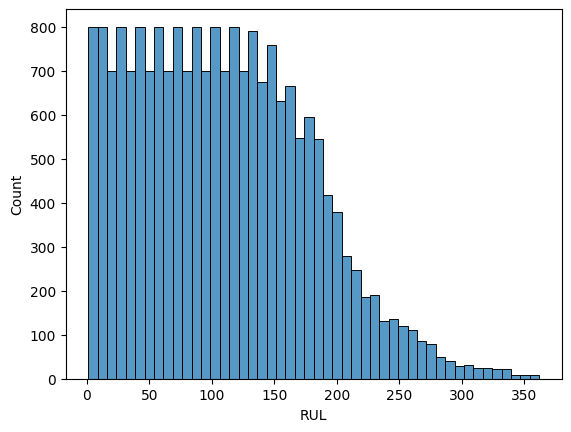

In [64]:
sns.histplot(rul_df['RUL'])

In [65]:
rul_df['RUL_log'] = rul_df['RUL'].apply(lambda x : np.log(x))
rul_df.head()

,engine,cycle,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL,RUL_log
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,5.257495
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,191,5.252273
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,190,5.247024
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,189,5.241747
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,188,5.236442


<Axes: xlabel='RUL_log', ylabel='Count'>

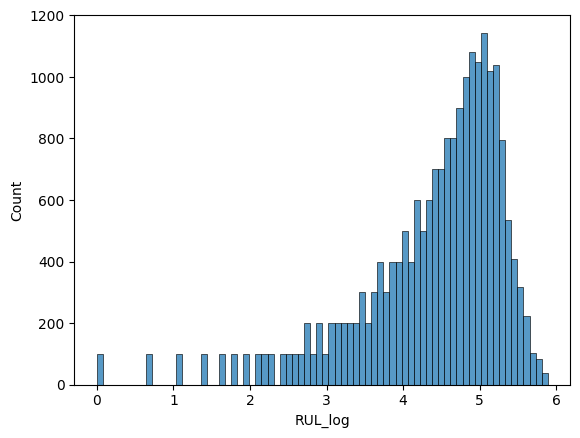

In [66]:
sns.histplot(rul_df['RUL_log'])

In [67]:
rul_df.tail()

,engine,cycle,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL,RUL_log
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,5,1.609438
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,4,1.386294
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,3,1.098612
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,2,0.693147
20630,100,200,643.85,1600.38,1432.14,550.79,2388.26,9061.48,48.20,519.30,2388.26,8137.33,8.5036,396,38.37,23.0522,1,0.000000


In [68]:
rul_df.columns

Index(['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL', 'RUL_log'],
      dtype='object')

In [69]:
interested = ['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL_log']
rul_df[interested].to_csv('exam2.modify3.csv', index=False)

In [70]:
rul_df = pd.read_csv('exam2.modify3.csv')
rul_df.columns

Index(['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL_log'],
      dtype='object')

In [71]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL_log'

train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [72]:
m1, m2, m3, m4 = rf(n_jobs=-1), xg( n_jobs=-1 ), lg(n_jobs=-1), cb(silent=True)

# n_jobs = -1   컴퓨터 자원을 최대한 이용해라.

In [73]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
m4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 10316, number of used features: 14
[LightGBM] [Info] Start training from score 4.371301


In [74]:
print(m1.score(X_train, y_train), m1.score(X_test, y_test))
print(m2.score(X_train, y_train), m2.score(X_test, y_test))
print(m3.score(X_train, y_train), m3.score(X_test, y_test))
print(m4.score(X_train, y_train), m4.score(X_test, y_test))

# m1 = 0.9487568571390359 0.6310122772711922
# m2 = 0.9016911387443542 0.5867979526519775
# m3 = 0.7678763179899359 0.6274747881162159
# m4 = 0.8085709829084649 0.6280756366998017

0.9793979626043944 0.8492000118312046
0.9524547456571324 0.8342562426927588
0.9059628093954009 0.8535134200337308
0.9189883199585236 0.85485146832631


### HyperParameter Tuning

Hyperparameter Tuning은 머신러닝 모델의 성능을 최적화하기 위해 하이퍼파라미터를 조정하는 과정입니다. 하이퍼파라미터는 모델의 학습 과정에 영향을 미치는 고정된 값으로, 학습 전에 설정해야 하며 자동으로 학습되지 않습니다. 하이퍼파라미터 튜닝은 모델의 일반화 성능을 높이고, 과대적합(overfitting)이나 과소적합(underfitting)을 방지하는 중요한 단계입니다.

### 하이퍼파라미터의 예시
- 결정 트리(Decision Tree): 최대 깊이(max_depth), 최소 샘플 분할 수(min_samples_split) 등
- 랜덤 포레스트(Random Forest): 결정 트리의 개수(n_estimators), 최대 깊이(max_depth) 등
- XGBoost, LightGBM: 학습률(learning_rate), 최대 깊이(max_depth), 부스팅 라운드 수(n_estimators) 등

하이퍼파라미터 튜닝을 위해 사용하는 대표적인 방법은 다음과 같습니다.

### 1. 그리드 탐색 (Grid Search)
- 모든 하이퍼파라미터 조합을 탐색하는 방식입니다. 각 하이퍼파라미터의 가능한 값들을 정의한 후, 가능한 모든 조합에 대해 모델을 학습하고 성능을 평가합니다. 하지만 모든 조합을 시도하므로 연산 비용이 높아질 수 있습니다.

### 2. 랜덤 탐색 (Random Search)
- 그리드 탐색과 달리, 하이퍼파라미터 조합 중 일부를 무작위로 선택하여 성능을 평가합니다. 연산 비용을 줄일 수 있으며, 일정 수준의 성능 향상을 기대할 수 있습니다.

### 3. 베이지안 최적화 (Bayesian Optimization)
- 과거의 탐색 결과를 기반으로 하이퍼파라미터 조합을 선택하여 더 효율적으로 최적의 하이퍼파라미터를 찾는 방법입니다. Hyperopt, Optuna 같은 라이브러리를 활용하여 베이지안 최적화를 수행할 수 있습니다.

### Grid Search를 통한 Random Forest Regressor 하이퍼파라미터 튜닝

주요 하이퍼파라미터

- n_estimators: 결정 트리의 개수. 일반적으로 많을수록 성능이 좋아지지만 학습 속도에 영향을 미칩니다.
- max_depth: 트리의 최대 깊이. 과대적합을 방지하기 위해 제한할 수 있습니다.
- min_samples_split: 노드를 분할하기 위한 최소 샘플 수.
- min_samples_leaf: 리프 노드의 최소 샘플 수. 과대적합을 방지하기 위해 설정할 수 있습니다.

In [75]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [76]:
# Step 1: 데이터 생성 : make_regression 함수를 사용하여 10개의 특성을 가지는 회귀용 가상 데이터를 생성하고, 학습 및 테스트 세트로 분할합니다.
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Step 2: 하이퍼파라미터 그리드 정의 : n_estimators, max_depth, min_samples_split, min_samples_leaf의 다양한 값들을 설정하여 가능한 조합을 생성합니다.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [124]:
3 * 4 * 3 * 3

108

In [79]:
# Step 3: GridSearchCV 설정 : GridSearchCV를 사용하여 하이퍼파라미터 그리드와 평가 방식을 정의합니다.
# neg_mean_squared_error를 사용하여 MSE(평균 제곱 오차)를 최소화하는 방향으로 최적의 모델을 찾습니다

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # MSE를 기준으로 최적의 모델 선택
    cv=3,                              # 3-폴드 교차 검증
    n_jobs=-1                          # 가능한 모든 CPU 코어 사용
)

In [80]:
# Step 4: 학습 및 최적의 모델 찾기 : 학습을 진행하여 최적의 하이퍼파라미터 조합을 찾고, 이를 출력합니다.
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 점수 출력
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (MSE): {-grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (MSE): 3126.1875


In [81]:
# Step 5: 테스트 세트에 대한 예측 및 평가 : 최적 모델로 테스트 세트에 대한 예측을 수행하고 MSE로 평가합니다.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse:.4f}")

Test Set Mean Squared Error: 2599.0710


### 결과 분석

- Best Parameters: 최적의 하이퍼파라미터 조합을 확인할 수 있습니다.
- Best Score (MSE): 교차 검증에서의 최적의 MSE를 확인할 수 있습니다.
- Test Set Mean Squared Error: 최적화된 모델의 테스트 세트에서의 성능을 MSE로 확인하여 모델이 잘 일반화되었는지 평가합니다.

이 코드를 실행하면 Grid Search를 통해 최적의 하이퍼파라미터 조합을 찾고, 그 모델이 테스트 데이터에서 어느 정도의 성능을 내는지 확인할 수 있습니다.

### Random Search를 통한 XGBoost Regressor 하이퍼파라미터 튜닝

주요 하이퍼파라미터

- n_estimators: 부스팅 단계의 수로, 트리 개수입니다.
- max_depth: 개별 트리의 최대 깊이로, 과적합을 방지하기 위해 설정합니다.
- learning_rate: 학습 속도를 조절하며, 작은 값일수록 학습이 느리지만 더 나은 결과를 얻을 수 있습니다.
- subsample: 각 트리 훈련에 사용되는 샘플 비율로, 과적합을 방지하는 데 사용됩니다.
- colsample_bytree: 각 트리 훈련 시 사용되는 특성의 비율입니다.

In [82]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [83]:
# Step 1: 데이터 생성 : make_regression 함수를 사용하여 10개의 특성을 가지는 회귀용 가상 데이터를 생성하고, 학습 및 테스트 세트로 분할합니다.
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Step 2: 하이퍼파라미터 공간 정의 : n_estimators, max_depth, learning_rate, subsample, colsample_bytree에 대해 랜덤하게 선택할 값들을 설정합니다.
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [85]:
# Step 3: RandomizedSearchCV 설정 : RandomizedSearchCV를 통해 최대 20개의 랜덤한 하이퍼파라미터 조합을 평가합니다. 
# scoring 매개변수로 neg_mean_squared_error를 사용하여 MSE를 최소화하는 방향으로 최적의 모델을 찾습니다.

random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # 20개의 랜덤 조합 평가
    scoring='neg_mean_squared_error',  # MSE를 기준으로 최적의 모델 선택
    cv=3,  # 3-폴드 교차 검증
    random_state=42,
    n_jobs=-1  # 가능한 모든 CPU 코어 사용
)

In [86]:
# Step 4: 학습 및 최적의 모델 찾기 : 학습을 진행하여 최적의 하이퍼파라미터 조합을 찾고, 이를 출력합니다.
random_search.fit(X_train, y_train)

# 최적의 파라미터와 점수 출력
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score (MSE): {-random_search.best_score_:.4f}")

Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Best Score (MSE): 953.7131


In [87]:
# Step 5: 테스트 세트에 대한 예측 및 평가 : 최적 모델로 테스트 세트에 대해 예측을 수행하고 MSE로 평가합니다
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse:.4f}")

Test Set Mean Squared Error: 600.4249


### 결과 분석
- Best Parameters: Random Search에서 찾은 최적의 하이퍼파라미터 조합입니다.
- Best Score (MSE): 교차 검증에서 얻은 최적의 MSE 점수입니다.
- Test Set Mean Squared Error: 최적화된 모델이 테스트 데이터에서 얼마나 잘 일반화되었는지를 확인할 수 있습니다.

이 예제는 Random Search를 통해 XGBoost Regressor 모델의 최적 하이퍼파라미터 조합을 효율적으로 찾는 과정을 보여줍니다. Grid Search에 비해 적은 계산량으로도 좋은 결과를 얻을 수 있습니다

### Bayesian Optimization을 통한 CatBoost Regressor 하이퍼파라미터 튜닝
Bayesian Optimization을 사용하여 CatBoost Regressor 모델의 하이퍼파라미터 튜닝을 수행하는 예제를 만들어 보겠습니다. Bayesian Optimization은 이전 탐색 결과를 바탕으로 다음 하이퍼파라미터 조합을 효율적으로 선택하여 최적의 하이퍼파라미터를 찾는 방법입니다. 이 예제에서는 hyperopt 라이브러리를 사용해 Bayesian Optimization을 구현합니다.

주요 하이퍼파라미터

- iterations: 학습할 부스팅 단계 수입니다.
- learning_rate: 학습 속도를 결정합니다.
- depth: 트리의 깊이로, 값이 클수록 모델이 복잡해져 과적합 위험이 증가할 수 있습니다.
- l2_leaf_reg: L2 정규화 계수로, 과적합을 줄이는 데 도움을 줍니다.
- bagging_temperature: 샘플링을 조절하여 과적합을 방지합니다.

!pip install catboost hyperopt

In [89]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll import scope

In [90]:
# Step 1: 데이터 생성 : make_regression 함수를 사용하여 10개의 특성을 가지는 회귀용 가상 데이터를 생성하고, 학습 및 테스트 세트로 분할합니다.
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Step 2: 하이퍼파라미터 공간 정의

# iterations, learning_rate, depth, l2_leaf_reg, bagging_temperature와 같은 하이퍼파라미터를 Bayesian Optimization에서 탐색할 범위로 설정합니다.
    
# - hp.quniform: 지정한 범위에서 정수형 하이퍼파라미터를 균등 분포로 샘플링합니다.
# - hp.loguniform: 하이퍼파라미터 값을 로그 스케일로 변환해 샘플링하여 작은 값과 큰 값 모두 고르게 탐색하도록 합니다.

param_space = {
    'iterations': scope.int(hp.quniform('iterations', 50, 500, 50)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'depth': scope.int(hp.quniform('depth', 4, 10, 1)),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1)
}

In [92]:
# Step 3: 최적화할 목적 함수 정의 : 하이퍼파라미터가 주어졌을 때 모델을 학습시키고, 
# 테스트 데이터에서 MSE를 계산해 반환하는 함수를 정의합니다.
# Bayesian Optimization은 이 함수를 최소화하도록 최적의 하이퍼파라미터를 찾습니다.
def objective(params):
    model = CatBoostRegressor(
        **params,
        loss_function='RMSE',
        verbose=0,  # 출력 생략
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [93]:
# Step 4: Bayesian Optimization 설정 및 실행

# fmin 함수를 통해 Bayesian Optimization을 설정하고 실행합니다.
# - fn: 최적화할 목적 함수입니다.
# - space: 하이퍼파라미터 탐색 공간입니다.
# - algo: 최적화 알고리즘으로, tpe.suggest는 Bayesian Optimization을 구현한 Tree-structured Parzen Estimator(TPE)를 사용합니다.
# - max_evals: 최대 평가 횟수입니다.
# - rstate: 난수 생성기 상태를 고정하여 결과의 재현성을 확보합니다.

trials = Trials()
best_params = fmin(
    fn=objective,
    space=param_space,
    algo=tpe.suggest,
    max_evals=30,  # 최대 30번의 하이퍼파라미터 조합 평가
    trials=trials,
    rstate=np.random.default_rng(42)  # 재현성 확보를 위해 random state 설정
)

print("Best Parameters:", best_params)

100%|██████████| 30/30 [00:37<00:00,  1.24s/trial, best loss: 157.81067865732288]
Best Parameters: {'bagging_temperature': np.float64(0.18973363556913403), 'depth': np.float64(4.0), 'iterations': np.float64(350.0), 'l2_leaf_reg': np.float64(4.296739275300984), 'learning_rate': np.float64(0.13279115852540738)}


### 결과 분석
- Best Parameters: Bayesian Optimization을 통해 찾은 최적의 하이퍼파라미터 조합입니다.
- fmin이 반환한 최적의 파라미터 조합을 사용하여 최종 CatBoost 모델을 학습시키고 평가할 수 있습니다.

In [94]:
# 최적의 하이퍼파라미터 조합을 적용하여 모델 학습
optimized_model = CatBoostRegressor(
    iterations=int(best_params['iterations']),
    learning_rate=best_params['learning_rate'],
    depth=int(best_params['depth']),
    l2_leaf_reg=best_params['l2_leaf_reg'],
    bagging_temperature=best_params['bagging_temperature'],
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

optimized_model.fit(X_train, y_train)
y_pred_optimized = optimized_model.predict(X_test)
optimized_mse = mean_squared_error(y_test, y_pred_optimized)
print(f"Optimized CatBoost MSE: {optimized_mse:.4f}")

Optimized CatBoost MSE: 157.8107


### 요약
Bayesian Optimization을 사용하여 CatBoost 모델의 하이퍼파라미터를 효율적으로 튜닝하는 방법을 설명했습니다. Bayesian Optimization은 탐색 공간이 클 때 특히 효과적이며, 이 과정을 통해 최적의 성능을 가진 모델을 확보할 수 있습니다.

In [97]:
rul_df = pd.read_csv('exam2.modify3.csv')
rul_df.columns

Index(['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL_log'],
      dtype='object')

In [98]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']

label = 'RUL_log' 

train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [102]:
sample_model = xg(reg_alpha=0.9)
sample_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [103]:
sample_model.score(X_test, y_test)

0.8372597490185281

In [105]:
def alpha_search(alpha):
    sample_model = xg(reg_alpha=alpha, n_jobs=-1)
    sample_model.fit(X_train, y_train)
    return sample_model.score(X_test, y_test)

In [107]:
alpha_search(0.1)

0.8363524653659147

In [110]:
def hyper_param(ra, rl, lr, md):
    sample_model = xg(reg_alpha=ra, reg_lambda=rl, learning_rate=lr, max_depth=int(md), n_jobs=-1)
    sample_model.fit(X_train, y_train)
    return sample_model.score(X_test, y_test)

In [111]:
hyper_param(0.1, 0.4, 0.6, 10)

0.7890204127232029

In [112]:
from bayes_opt import BayesianOptimization as bo

epsilon = 0.1 ** 10    # 최적화 할 수 있는 목표 함수
float_range = ( epsilon, 1 - epsilon)
pbounds = { 'ra' : float_range, 'rl' : float_range, 'lr': float_range, 'md': (5, 20) } # 최적화 범위

optimizer = bo(f=hyper_param, pbounds=pbounds)

In [113]:
optimizer.maximize(n_iter=20)

|   iter    |  target   |    lr     |    md     |    ra     |    rl     |
-------------------------------------------------------------------------
| 1         | 0.8311    | 0.221     | 12.27     | 0.7396    | 0.9115    |
| 2         | 0.8111    | 0.455     | 9.335     | 0.5013    | 0.622     |
| 3         | 0.8037    | 0.5127    | 10.07     | 0.5557    | 0.7228    |
| 4         | 0.7876    | 0.5963    | 13.9      | 0.03385   | 0.6299    |
| 5         | 0.8434    | 0.2537    | 5.122     | 0.1659    | 0.1474    |
| 6         | 0.8353    | 0.3691    | 5.734     | 0.3436    | 0.544     |
| 7         | 0.7936    | 0.7709    | 5.026     | 0.997     | 0.09745   |
| 8         | 0.8392    | 0.2909    | 5.023     | 0.1798    | 0.1925    |
| 9         | 0.8441    | 0.1873    | 6.089     | 0.03338   | 0.099     |
| 10        | 0.8506    | 0.05004   | 7.121     | 0.158     | 0.8291    |
| 11        | 0.7137    | 0.9934    | 7.135     | 0.0108    | 0.8647    |
| 12        | 0.7906    | 0.01444   | 

In [115]:
param_set = optimizer.max['params']
param_set

{'lr': np.float64(0.11272814682324249),
 'md': np.float64(5.697554752136297),
 'ra': np.float64(0.49472737050420806),
 'rl': np.float64(0.05986293714130835)}

In [116]:
tuned_model = xg(n_jobs=-1, 
        reg_alpha=param_set['ra'],
        reg_lambda=param_set['rl'],
        learning_rate=param_set['lr'],
        max_depth=int(param_set['md']))

tuned_model.fit(X_train, y_train)
tuned_model.score(X_test, y_test)

0.8524995668854665

In [117]:
from xgboost import XGBRegressor as xg      # 일반인 그룹에서 개발
from lightgbm import LGBMRegressor as lg    # MS에서 개발 xgboost 경량화 버전 - xgboost 대비 속도가 빠름
from catboost import CatBoostRegressor as cb  # cat- categorical, 속도가 늦은 default 
from sklearn.ensemble import RandomForestRegressor as rf

In [118]:
def hyper_param(nl, md, ra, rl):
    sample_model = lg(num_leaves=int(nl),
                      max_depth=int(md),
                      reg_alpha=ra,
                      reg_lambda=rl,
                      n_jobs=-1)
    sample_model.fit(X_train, y_train)
    return sample_model.score(X_test, y_test)

In [119]:
pbounds = { 'nl' : (5, 30), 'md' : (5, 30), 'ra' : float_range, 'rl' : float_range}
optimizer = bo(f=hyper_param, pbounds=pbounds)
optimizer.maximize()

|   iter    |  target   |    md     |    nl     |    ra     |    rl     |
-------------------------------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 10316, number of used features: 14
[LightGBM] [Info] Start training from score 4.371301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 1         | 0.8539    | 7.186     | 14.79     | 0.1654    | 0.9722    |
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 10316, number of used features: 14
[LightGBM] [Info] Start training from score 4.371301
| 2         | 0.853

In [120]:
optimizer.max

{'target': np.float64(0.854897728935625),
 'params': {'md': np.float64(23.98338152975762),
  'nl': np.float64(18.067966211176667),
  'ra': np.float64(0.34243579453352907),
  'rl': np.float64(0.02785888087354003)}}

In [121]:
model = xg(n_jobs=-1, 
        reg_alpha=param_set['ra'],
        reg_lambda=param_set['rl'],
        learning_rate=param_set['lr'],
        max_depth=int(param_set['md']))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524995668854665

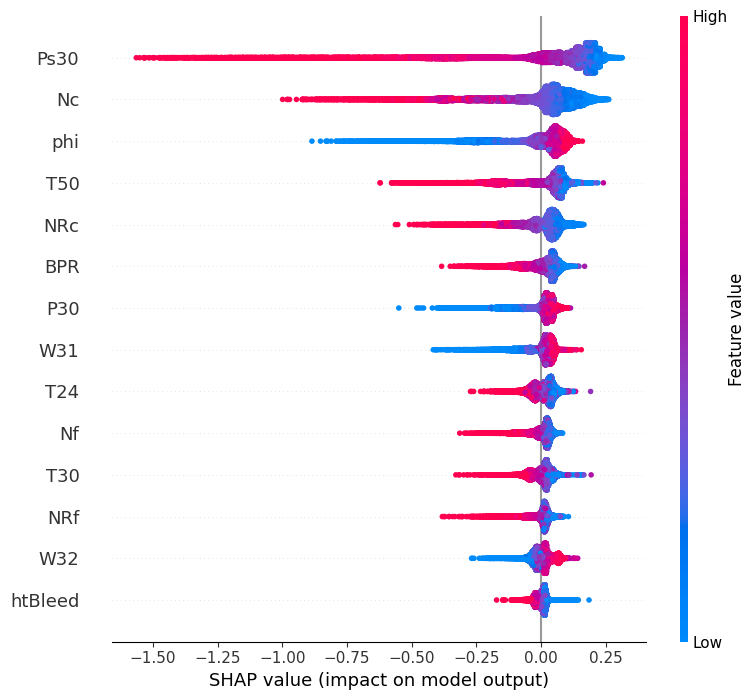

In [122]:
import shap

X = rul_df[features]

shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X)

#### 결론 
- 지금까지 해당 column들의 의미는 부여하지 않음
- 이후에 도메인 지식을 이용해 분석을 이어가야 함
- 생소한 데이터를 마주 했을때 column의 의미를 부여하지 않고도 분석하는 방향을 이해할 수 있음

### PDP (Partial Denpendence Plot)
머신러닝 모델의 예측에 대한 분석. 특정 Fertures가 어떻게 영향을 미치느느지 시각적으로 나타내는 방법입니다.
PDP는 shap와 같이 핵석 가능한 머신러닝 모델을 만드는데 유용하게 상용되며,  특힘 모델이 복잡할 때 특정 Features가 예측에 미치는 영향을 이해하는데 큰 도움이됩니다.

- One-Way PDP : 하나의 feature가 모델에 미치는 영향을 보여주는 것
- Two-Way PDP : 두개의 feature가 동시에 모델 예측에 미치는 상호작용을 보여주는 것